In [1]:
import os
import cv2
from skimage.feature import hog
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [2]:
def load_and_preprocess_data(data_dir, image_size):
    X, y = [], []

    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            label = 1 if category == 'dogs' else 0 

            for filename in os.listdir(category_path):
                img_path = os.path.join(category_path, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (image_size, image_size)) 
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

                features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

                X.append(features)
                y.append(label)

    return np.array(X), np.array(y)

In [3]:
data_dir='dogs-vs-cats/train'
image_size=64

X,y=load_and_preprocess_data(data_dir,image_size)
X=X/255.0
X_flatten=X.reshape(X.shape[0],-1)
unique_labels = np.unique(y)
print(f'Unique Labels: {unique_labels}')

Unique Labels: [0 1]


In [4]:

X_train,X_test,y_train,y_test=train_test_split(X_flatten,y,test_size=0.2,random_state=42)

param_grid = {
    'C': [1],
    'kernel': ['rbf'],
}

svm_model = SVC(random_state=42, probability=True, class_weight='balanced')

grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


Accuracy: 0.7293921731890092
              precision    recall  f1-score   support

         cat       0.74      0.72      0.73       613
         dog       0.72      0.74      0.73       588

    accuracy                           0.73      1201
   macro avg       0.73      0.73      0.73      1201
weighted avg       0.73      0.73      0.73      1201



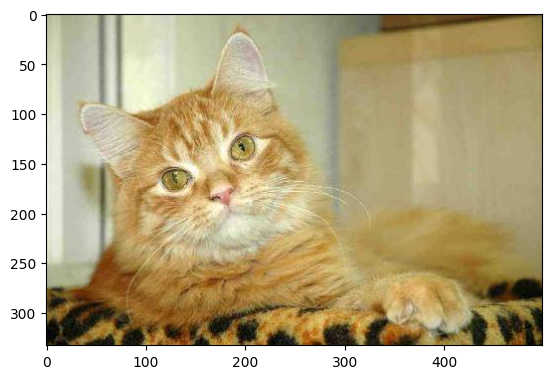

Predicted Label: Cat


In [7]:
import cv2
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

def preprocess_image(image_path):

    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = resize(gray_image, (64, 64))

    features, _ = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    features_flatten = features.flatten()

    return features_flatten

image_path = 'dogs-vs-cats/test1/89.jpg'
preprocessed_image = preprocess_image(image_path)
img=imread(image_path)
plt.imshow(img)
plt.show()

reshaped_image = preprocessed_image.reshape(1, -1)

prediction = grid_search.predict(reshaped_image)
if prediction == 0:
    print("Predicted Label: Cat")
else:
    print("Predicted Label: Dog")